In [26]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import re
import requests, bs4
import seaborn as sns
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from time import time
from sklearn.metrics import mean_squared_error
from math import sqrt
import tkinter as tk
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
from sklearn.linear_model import LinearRegression

In [27]:
gfp = pd.read_csv('global_food_prices.csv')
rawcovid = pd.read_csv('time_series_covid19_deaths_global.csv')
GHI_2019 = pd.read_excel('2019GHI.xlsx' )
GHI_2020 = pd.read_excel('2020GHI.xlsx' )
GHI_2021 = pd.read_excel('2021GHI.xls' ) 

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
GHI_2019.columns = ['Country','2019']
GHI_2020.columns = ['Country','2020']
GHI_2021.columns = ['Country','2021']


In [29]:
exchange = pd.read_csv('joshy2.csv')
exchange = exchange.rename(columns={'Country Name': 'Country'})
exchange = exchange[['Country','2020']]
exchange = exchange.dropna()

In [30]:
del gfp['adm1_name' ]
del gfp['mkt_id' ]
del gfp['mkt_name' ]
del gfp['cm_id' ]
del gfp['cur_id' ]
del gfp['pt_id' ]
del gfp['pt_name' ]
del gfp['mp_commoditysource' ]

del rawcovid['Province/State']
del rawcovid['Lat']
del rawcovid['Long']



In [31]:
pred_gfp=gfp[gfp['mp_year'] >= 2019]


In [32]:
del pred_gfp['adm1_id' ]
del pred_gfp['adm0_id' ]
del pred_gfp['um_id' ]
del pred_gfp['um_name' ]
del pred_gfp['cm_name' ]
del pred_gfp['cur_name']

In [33]:
pred_gfp=pred_gfp.dropna()
pred_gfp = pred_gfp.rename(columns={'adm0_name': 'Country','mp_year':'Year','mp_month':'Month'})

In [34]:
pred_gfp2 = pd.merge(pred_gfp, exchange, on='Country')
pred_gfp2['USD'] = pred_gfp2['mp_price'] * pred_gfp2['2020']
pred_gfp2 = pred_gfp2.drop(columns=['mp_price','2020'])
pred_gfp2

Country  Month  Year           USD
0       Afghanistan      1  2019   3840.676822
1       Afghanistan      2  2019   3840.676822
2       Afghanistan      3  2019   3840.676822
3       Afghanistan      4  2019   3840.676822
4       Afghanistan      5  2019   3840.676822
...             ...    ...   ...           ...
536990     Zimbabwe      6  2021  11976.768017
536991     Zimbabwe      6  2021   5774.513976
536992     Zimbabwe      6  2021   5851.507496
536993     Zimbabwe      6  2021   3054.076281
536994     Zimbabwe      6  2021  61594.815744

[536995 rows x 4 columns]

In [35]:
pred_gfp2=(pred_gfp2.groupby(["Country","Month","Year"])['USD'].sum()).reset_index()

In [36]:
GHI_Df = pd.merge(GHI_2019[GHI_2019.columns],
                 GHI_2020[GHI_2020.columns],
                 on=['Country'])

In [37]:
GHI_Df = pd.merge(GHI_Df[GHI_Df.columns],
                 GHI_2021[GHI_2021.columns],
                 on=['Country'])


In [38]:
GHI_Df['2019'] = GHI_Df['2019'].astype(str).str.replace('<', '').astype(float)
GHI_Df['2020'] = GHI_Df['2020'].astype(str).str.replace('<', '').astype(float)
GHI_Df['2021'] = GHI_Df['2021'].astype(str).str.replace('<', '').astype(float)

In [39]:
ghi_df=GHI_Df
ghi_df.head(5)

Country  2019  2020  2021
0     Belarus   5.0   5.0   5.0
1    Bulgaria   5.0   5.5   6.1
2       Chile   5.0   5.0   5.0
3  Costa Rica   5.0   5.0   5.3
4     Croatia   5.0   5.0   5.0

In [40]:
pred_ghi = ghi_df
pred_ghi = pd.melt(pred_ghi, id_vars=['Country'], var_name='Year')
pred_ghi['Year'] = pred_ghi['Year'].astype(float)
pred_ghi

Country    Year  value
0                     Belarus  2019.0    5.0
1                    Bulgaria  2019.0    5.0
2                       Chile  2019.0    5.0
3                  Costa Rica  2019.0    5.0
4                     Croatia  2019.0    5.0
..                        ...     ...    ...
289                   Liberia  2021.0   33.3
290                Madagascar  2021.0   36.3
291                      Chad  2021.0   39.6
292                     Yemen  2021.0   45.1
293  Central African Republic  2021.0   43.0

[294 rows x 3 columns]

In [41]:
test69= pd.merge(pred_ghi[pred_ghi.columns],
                pred_gfp2[pred_gfp2.columns],
                 on=['Country','Year'] )


In [42]:
test56=test69
test56['Date']= pd.to_datetime(test56[['Year', 'Month']].assign(DAY=1))
test56 = test56.drop(columns=['Year','Month'])
ghi_pred = test56.copy()
pred_covid = pd.melt(rawcovid, id_vars='Country/Region',  var_name='Date', 
                       value_name='Deaths')
pred_covid['Date'] = pd.to_datetime(pred_covid['Date'])
covg2 = pd.merge(pred_covid, ghi_pred, on='Date')

In [163]:
LARGEFONT =("Verdana", 15)
class tkinterApp(tk.Tk):

    # __init__ function for class tkinterApp
    def __init__(self, *args, **kwargs):
         
        # __init__ function for class Tk
        tk.Tk.__init__(self, *args, **kwargs)
         
        # creating a container
        container = tk.Frame(self) 
        container.pack(side = "top", fill = "both", expand = True)
        self.configure(background='blue')
        container.grid_rowconfigure(0, weight = 1)
        container.grid_columnconfigure(0, weight = 1)
  
        # initializing frames to an empty array
        self.frames = {} 
        
        # iterating through a tuple consisting
        # of the different page layouts
        for F in (StartPage, Page1, Page2,Page3,Page4):
  
            frame = F(container, self)
  
            # initializing frame of that object from
            # startpage, page1, page2 respectively with
            # for loop
            self.frames[F] = frame
  
            frame.grid(row = 0, column = 0, sticky ="nsew")
  
        self.show_frame(StartPage)
  
    # to display the current frame passed as
    # parameter
    def show_frame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()
  

In [164]:
class StartPage(tk.Frame):
   
    def __init__(self, parent, controller):
        
        tk.Frame.__init__(self, parent)
        
        def contry_Pred3(country):
            country = variable.get()
            global test69
            test=test69
            test=test[test["Country"]== country]
            test['Date']= pd.to_datetime(test[['Year', 'Month']].assign(DAY=1))
            test = test.drop(columns=['Year','Month','Country'])
            test2 = test.groupby(["Date"])['USD','value'].sum()
            test2['Ratio'] = test2['value']/test2['USD']
            test2 = test2.drop(columns=['USD','value'])
            train3 = test2[test2.index.year < 2020]
            test3 = test2[test2.index.year > 2019]
            y_hat_avg = test3.copy()
            pred = []
            a = 0.3 #after testing multiple values for alpha, 0.4 seemed nearest to the alpha that produced the lowest value for RMS

            ft = pd.DataFrame.ewm(train3,alpha=a).mean()['Ratio'].iloc[-1]
            pred.append(ft)
            for i in range(1,len(test3['Ratio'])):
              dt=test3['Ratio'].iloc[i-1]
              ft_plus_1 = a*dt + (1-a)*ft;
              pred.append(ft_plus_1)
              ft = ft_plus_1
            y_hat_avg['SES'] = pd.Series(pred).values
            rms = sqrt(mean_squared_error(test3.Ratio, y_hat_avg.SES))
            print(country)
            fig=plt.figure(figsize=(16,8))
            plt.title('Forecasting of the Ratio of Global Hunger Index and Global Food Prices for ')
            plt.plot(train3['Ratio'], label='Train')
            plt.plot(test3['Ratio'], label='Test')
            plt.plot(y_hat_avg['SES'], label='SES')
            plt.legend(loc='best')
            plt.show()
        # label of frame Layout 2
        label = tk.Label(self, text ="How food prices would continue to affect each countries’ GHI relative change after the pandemic", font = LARGEFONT)
         
        # putting the grid in its place by using
        # grid
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
  
        button1 = tk.Button(self, text ="GHI Predictions",
        command = lambda : controller.show_frame(Page1))
    
        countries= ['Belarus', 'Turkey', 'Argentina', 'Kazakhstan',
       'Russian Federation', 'Mexico', 'China', 'Colombia', 'Armenia',
       'Paraguay', 'Peru', 'Dominican Republic', 'Panama', 'El Salvador',
       'Mongolia', 'Thailand', 'Jordan', 'Ecuador', 'Lebanon', 'Honduras',
       'Nicaragua', 'Ghana', 'South Africa', 'Sri Lanka', 'Senegal',
       'Iraq', 'Myanmar', 'Indonesia', 'Philippines', 'Guatemala',
       'Nepal', 'Cameroon', 'Cambodia', 'Malawi', 'Lesotho', 'Togo',
       'Benin', 'Mali', 'Namibia', 'Kenya', 'Bangladesh', 'Burkina Faso',
       'Mauritania', 'Nigeria', 'Pakistan', 'Mozambique', 'Ethiopia',
       'Rwanda', 'Angola', 'Sierra Leone', 'Sudan', 'Afghanistan',
       'Haiti', 'Liberia', 'Madagascar', 'Chad',
       'Central African Republic']
        variable = StringVar()
        
    
        dropdown = OptionMenu(self,variable,*countries,command=contry_Pred3)
        dropdown.grid(row = 1, column = 4, padx = 10, pady = 10)
        # putting the button in its place by
        # using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)
  
        ## button to show frame 2 with text layout2
        button2 = tk.Button(self, text ="Mortality Rate Prediction",
        command = lambda : controller.show_frame(Page2))
        
        # putting the button in its place by
        # using grid
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)
        
        button3 = tk.Button(self, text ="Forecasting GHI/ GFP",
        command = lambda : controller.show_frame(Page3))
        
        # putting the button in its place by
        # using grid
        button3.grid(row = 3, column = 1, padx = 10, pady = 10)
  
        button4 = tk.Button(self, text ="Forecasting GHI/Mortality Rate",
        command = lambda : controller.show_frame(Page4))
        
        # putting the button in its place by
        # using grid
        button4.grid(row = 4, column = 1, padx = 10, pady = 10)
  

In [165]:
class Page1(tk.Frame):
        
        
    def __init__(self, parent, controller):
        def contry(country):
            country = variable.get()
            global test69
            test=test69
            test['Date']= pd.to_datetime(test[['Year', 'Month']].assign(DAY=1))
            test = test.drop(columns=['Year','Month'])
            ghi_pred = test.copy()
            ghi_pred = ghi_pred [ghi_pred["Country"]== country]
            ghi_pred = ghi_pred.drop(columns=['USD','Country'])
            ghi_pred = ghi_pred.groupby(["Date"]).mean()
            ghi_pred = pd.DataFrame(ghi_pred)
            ghi_pred = ghi_pred[:-2]
            ghitrain = ghi_pred[ghi_pred.index.year < 2020]
            ghitest = ghi_pred[ghi_pred.index.year > 2019]


            y_hat_avg = ghitest.copy()
            pred = []
            a = 0.4 #after testing multiple values for alpha, 0.4 seemed nearest to the alpha that produced the lowest value for RMS

            ft = pd.DataFrame.ewm(ghitrain,alpha=a).mean()['value'].iloc[-1]
            pred.append(ft)
            for i in range(1,len(ghitest['value'])):
              dt=ghitest['value'].iloc[i-1]
              ft_plus_1 = a*dt + (1-a)*ft;
              pred.append(ft_plus_1)
              ft = ft_plus_1
            y_hat_avg['SES'] = pd.Series(pred).values

            rms = sqrt(mean_squared_error(ghitest.value, y_hat_avg.SES))
            plt.figure(figsize=(16,8))
            plt.title('RATIO')
            plt.plot(ghitrain['value'], label='Train')
            plt.plot(ghitest['value'], label='Test')
            plt.plot(y_hat_avg['SES'], label='SES')
            plt.legend(loc='best')
            plt.show()
         
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text ="Post-2021 graph on GHI relative changes for each country", font = LARGEFONT)
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
  
        # button to show frame 2 with text
        # layout2
        button1 = tk.Button(self, text ="GHI/GDP",
                            command = lambda : controller.show_frame(StartPage))
        countries2= ['Belarus', 'Turkey', 'Argentina', 'Kazakhstan',
       'Russian Federation', 'Mexico', 'China', 'Colombia', 'Armenia',
       'Paraguay', 'Peru', 'Dominican Republic', 'Panama', 'El Salvador',
       'Mongolia', 'Thailand', 'Jordan', 'Ecuador', 'Lebanon', 'Honduras',
       'Nicaragua', 'Ghana', 'South Africa', 'Sri Lanka', 'Senegal',
       'Iraq', 'Myanmar', 'Indonesia', 'Philippines', 'Guatemala',
       'Nepal', 'Cameroon', 'Cambodia', 'Malawi', 'Lesotho', 'Togo',
       'Benin', 'Mali', 'Namibia', 'Kenya', 'Bangladesh', 'Burkina Faso',
       'Mauritania', 'Nigeria', 'Pakistan', 'Mozambique', 'Ethiopia',
       'Rwanda', 'Angola', 'Sierra Leone', 'Sudan', 'Afghanistan',
       'Haiti', 'Liberia', 'Madagascar', 'Chad',
       'Central African Republic']
        variable = StringVar()
        
            
        dropdown = OptionMenu(self,variable,*countries2,command=contry)
        dropdown.grid(row = 1, column = 4, padx = 10, pady = 10)
        # putting the button in its place
        # by using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)
  
        # button to show frame 2 with text
        # layout2
        button2 = tk.Button(self, text ="Mortality Rate Prediction",
                            command = lambda : controller.show_frame(Page2))
     
        # putting the button in its place by
        # using grid
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)
  
        button3 = tk.Button(self, text ="Forecasting GHI/ GFP",
        command = lambda : controller.show_frame(Page3))
        
        # putting the button in its place by
        # using grid
        button3.grid(row = 3, column = 1, padx = 10, pady = 10)
  
        button4 = tk.Button(self, text ="Forecasting GHI/Mortality Rate",
        command = lambda : controller.show_frame(Page3))
        
        # putting the button in its place by
        # using grid
        button4.grid(row = 4, column = 1, padx = 10, pady = 10)
  

In [166]:
class Page2(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        def contry(country):
            country = variable.get()
            global covg2
            covg=covg2
            covg=covg[covg["Country"]== country]
            covg = covg.drop(columns='Country/Region')
            covg = covg.groupby("Date")['Deaths','value'].sum()
            covg['Ratio'] = covg['Deaths']/covg['value']
            covg = covg.drop(columns=['Deaths','value'])
            covtrain = covg[covg.index.year < 2021]
            covtest = covg[covg.index.year > 2020]
            y_hat_avg = covtest.copy()
            pred = []
            a = 0.8 #after testing multiple values for alpha, 0.4 seemed nearest to the alpha that produced the lowest value for RMS

            ft = pd.DataFrame.ewm(covtrain,alpha=a).mean()['Ratio'].iloc[-1]
            pred.append(ft)
            for i in range(1,len(covtest['Ratio'])):
              dt=covtest['Ratio'].iloc[i-1]
              ft_plus_1 = a*dt + (1-a)*ft;
              pred.append(ft_plus_1)
              ft = ft_plus_1
            y_hat_avg['SES'] = pd.Series(pred).values

            rms = sqrt(mean_squared_error(covtest.Ratio, y_hat_avg.SES))
            print(rms)

            plt.figure(figsize=(16,8))
            plt.title('Forecasting of the Ratio of Mortality Rates and Global Hunger Index')
            plt.plot(covtrain['Ratio'], label='Train')
            plt.plot(covtest['Ratio'], label='Test')
            plt.plot(y_hat_avg['SES'], label='SES')
            plt.legend(loc='best')
            plt.show()
        label = tk.Label(self, text ="Post-2021 graph on mortality rates for each country", font = LARGEFONT)
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
  
        # button to show frame 2 with text
        # layout2
        button1 = tk.Button(self, text ="Global Food Price Prediction Analysis",
                            command = lambda : controller.show_frame(Page1))
     
        # putting the button in its place by
        # using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)
        countries2= ['Belarus', 'Turkey', 'Argentina', 'Kazakhstan',
       'Russian Federation', 'Mexico', 'China', 'Colombia', 'Armenia',
       'Paraguay', 'Peru', 'Dominican Republic', 'Panama', 'El Salvador',
       'Mongolia', 'Thailand', 'Jordan', 'Ecuador', 'Lebanon', 'Honduras',
       'Nicaragua', 'Ghana', 'South Africa', 'Sri Lanka', 'Senegal',
       'Iraq', 'Myanmar', 'Indonesia', 'Philippines', 'Guatemala',
       'Nepal', 'Cameroon', 'Cambodia', 'Malawi', 'Lesotho', 'Togo',
       'Benin', 'Mali', 'Namibia', 'Kenya', 'Bangladesh', 'Burkina Faso',
       'Mauritania', 'Nigeria', 'Pakistan', 'Mozambique', 'Ethiopia',
       'Rwanda', 'Angola', 'Sierra Leone', 'Sudan', 'Afghanistan',
       'Haiti', 'Liberia', 'Madagascar', 'Chad',
       'Central African Republic']
        variable = StringVar()
        
            
        dropdown = OptionMenu(self,variable,*countries2,command=contry)
        dropdown.grid(row = 1, column = 4, padx = 10, pady = 10)
        # button to show frame 3 with text
        # layout3
        button2 = tk.Button(self, text ="GHI Changes ",
                            command = lambda : controller.show_frame(StartPage))
     
        # putting the button in its place by
        # using grid
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)
        
        button3 = tk.Button(self, text ="Forecasting GHI/ GFP",
        command = lambda : controller.show_frame(Page3))
        
        # putting the button in its place by
        # using grid
        button3.grid(row = 3, column = 1, padx = 10, pady = 10)
  
        button4 = tk.Button(self, text ="Forecasting GHI/Mortality Rate",
        command = lambda : controller.show_frame(Page4))
        
        # putting the button in its place by
        # using grid
        button4.grid(row = 4, column = 1, padx = 10, pady = 10)
  

In [167]:
class Page3(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        def contry(country):
            country = variable.get()
            global test69
            a=test69
            a=a[a["Country"]== country]
            a = a.groupby(["Date"])['USD','value'].sum()
            x = np.array(a['value']).reshape((-1, 1))
            y = np.array(a['USD'])
            model = LinearRegression().fit(x, y)
            r_sq = model.score(x, y)
            y_pred = model.intercept_ + model.coef_ * x
            y_pred = pd.DataFrame(y_pred)
            a = a.reset_index()
            b = pd.concat([a,y_pred],ignore_index=True,axis=1)
            b.columns=['Date','USD','value','Reg']
            b.set_index('Date', inplace=True)
            b = b.drop(columns=["USD","value"])
            btrain = b[b.index.year < 2020]
            btest = b[b.index.year > 2019]
            y_hat_avg = btest.copy()
            pred = []
            a = 0.3 #after testing multiple values for alpha, 0.4 seemed nearest to the alpha that produced the lowest value for RMS

            ft = pd.DataFrame.ewm(btrain,alpha=a).mean()['Reg'].iloc[-1]
            pred.append(ft)
            for i in range(1,len(btest['Reg'])):
              dt=btest['Reg'].iloc[i-1]
              ft_plus_1 = a*dt + (1-a)*ft;
              pred.append(ft_plus_1)
              ft = ft_plus_1
            y_hat_avg['SES'] = pd.Series(pred).values

            rms = sqrt(mean_squared_error(btest.Reg, y_hat_avg.SES))
            print(rms)

            plt.figure(figsize=(16,8))
            plt.title('Forecasting of the Relationship between Global Hunger Index and Global Food Prices')
            plt.plot(btrain['Reg'], label='Train')
            plt.plot(btest['Reg'], label='Test')
            plt.plot(y_hat_avg['SES'], label='SES')
            plt.legend(loc='best')
            plt.show()
        label = tk.Label(self, text ="Forecasting GHI/ GFP", font = LARGEFONT)
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
  
        # button to show frame 2 with text
        # layout2
        button1 = tk.Button(self, text ="Global Food Price Prediction Analysis",
                            command = lambda : controller.show_frame(StartPage))
     
        # putting the button in its place by
        # using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)
        countries2= ['Belarus', 'Turkey', 'Argentina', 'Kazakhstan',
       'Russian Federation', 'Mexico', 'China', 'Colombia', 'Armenia',
       'Paraguay', 'Peru', 'Dominican Republic', 'Panama', 'El Salvador',
       'Mongolia', 'Thailand', 'Jordan', 'Ecuador', 'Lebanon', 'Honduras',
       'Nicaragua', 'Ghana', 'South Africa', 'Sri Lanka', 'Senegal',
       'Iraq', 'Myanmar', 'Indonesia', 'Philippines', 'Guatemala',
       'Nepal', 'Cameroon', 'Cambodia', 'Malawi', 'Lesotho', 'Togo',
       'Benin', 'Mali', 'Namibia', 'Kenya', 'Bangladesh', 'Burkina Faso',
       'Mauritania', 'Nigeria', 'Pakistan', 'Mozambique', 'Ethiopia',
       'Rwanda', 'Angola', 'Sierra Leone', 'Sudan', 'Afghanistan',
       'Haiti', 'Liberia', 'Madagascar', 'Chad',
       'Central African Republic']
        variable = StringVar()
        
            
        dropdown = OptionMenu(self,variable,*countries2,command=contry)
        dropdown.grid(row = 1, column = 4, padx = 10, pady = 10)
        # button to show frame 3 with text
        # layout3
        button2 = tk.Button(self, text ="GHI Changes ",
                            command = lambda : controller.show_frame(Page1))
     
        # putting the button in its place by
        # using grid
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)
        
        button3 = tk.Button(self, text ="Mortality Rate Changes",
        command = lambda : controller.show_frame(Page2))
        
        # putting the button in its place by
        # using grid
        button3.grid(row = 3, column = 1, padx = 10, pady = 10)
  
        button4 = tk.Button(self, text ="Forecasting GHI/Mortality Rate",
        command = lambda : controller.show_frame(Page4))
        
        # putting the button in its place by
        # using grid
        button4.grid(row = 4, column = 1, padx = 10, pady = 10)

In [168]:
class Page4(tk.Frame):
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        def contry(country):
            country = variable.get()
            global test69
            global weo_df
            global pred_gfp
            e = pd.merge(weo_df, pred_gfp, on=['Country'] )
            e=e[e["Country"]== country]
            e['Date']= pd.to_datetime(e[['Year', 'Month']].assign(DAY=1))
            e = e.drop(columns=['Country','Subject Descriptor','2020','GDP_Total','Month','Year'])
            e = e.set_index('Date')
            x = np.array(e['Totals']).reshape((-1, 1))
            y = np.array(e['mp_price'])
            model = LinearRegression().fit(x, y)
            y_pred2 = model.intercept_ + model.coef_ * x
            e = e.reset_index()
            f = pd.concat([e,y_pred2],ignore_index=True,axis=1)
            f.columns=['Date','Deaths','value','Reg']
            f.set_index('Date', inplace=True)
            f = f.drop(columns=["Deaths","value"])
            dtrain = f[f.index.year < 2021]
            dtest = f[f.index.year > 2020]
            
            self.configure(bg='blue')
            y_hat_avg = dtest.copy()
            pred = []
            a = 0.5 #after testing multiple values for alpha, 0.4 seemed nearest to the alpha that produced the lowest value for RMS

            ft = pd.DataFrame.ewm(dtrain,alpha=a).mean()['Reg'].iloc[-1]
            pred.append(ft)
            for i in range(1,len(dtest['Reg'])):
              dt=dtest['Reg'].iloc[i-1]
              ft_plus_1 = a*dt + (1-a)*ft;
              pred.append(ft_plus_1)
              ft = ft_plus_1
            y_hat_avg['SES'] = pd.Series(pred).values

            rms = sqrt(mean_squared_error(dtest.Reg, y_hat_avg.SES))
            print(rms)

            plt.figure(figsize=(16,8))
            plt.title('Forecasting of the Relationship between Global Hunger Index and Mortality Rates')
            plt.plot(dtrain['Reg'], label='Train')
            plt.plot(dtest['Reg'], label='Test')
            plt.plot(y_hat_avg['SES'], label='SES')
            plt.legend(loc='best')
            plt.show()

     
        label = tk.Label(self, text ="Forecasting GHI/Mortality Rate", font = LARGEFONT)
        label.grid(row = 0, column = 4, padx = 10, pady = 10)
  
        # button to show frame 2 with text
        # layout2
        button1 = tk.Button(self, text ="Global Food Price Prediction Analysis",
                            command = lambda : controller.show_frame(StartPage))
     
        # putting the button in its place by
        # using grid
        button1.grid(row = 1, column = 1, padx = 10, pady = 10)
        countries2= ['Belarus', 'Turkey', 'Argentina', 'Kazakhstan',
       'Russian Federation', 'Mexico', 'China', 'Colombia', 'Armenia',
       'Paraguay', 'Peru', 'Dominican Republic', 'Panama', 'El Salvador',
       'Mongolia', 'Thailand', 'Jordan', 'Ecuador', 'Lebanon', 'Honduras',
       'Nicaragua', 'Ghana', 'South Africa', 'Sri Lanka', 'Senegal',
       'Iraq', 'Myanmar', 'Indonesia', 'Philippines', 'Guatemala',
       'Nepal', 'Cameroon', 'Cambodia', 'Malawi', 'Lesotho', 'Togo',
       'Benin', 'Mali', 'Namibia', 'Kenya', 'Bangladesh', 'Burkina Faso',
       'Mauritania', 'Nigeria', 'Pakistan', 'Mozambique', 'Ethiopia',
       'Rwanda', 'Angola', 'Sierra Leone', 'Sudan', 'Afghanistan',
       'Haiti', 'Liberia', 'Madagascar', 'Chad',
       'Central African Republic']
        variable = StringVar()
        
           
        dropdown = OptionMenu(self,variable,*countries2,command=contry)
        dropdown.grid(row = 1, column = 4, padx = 10, pady = 10)
        # button to show frame 3 with text
        # layout3
        button2 = tk.Button(self, text ="GHI Changes ",
                            command = lambda : controller.show_frame(Page1))
     
        # putting the button in its place by
        # using grid
        button2.grid(row = 2, column = 1, padx = 10, pady = 10)
        
        button3 = tk.Button(self, text ="Mortality Rate Changes",
        command = lambda : controller.show_frame(Page2))
        
        # putting the button in its place by
        # using grid
        button3.grid(row = 3, column = 1, padx = 10, pady = 10)
  
        button4 = tk.Button(self, text ="Forecasting GHI/ GFP",
        command = lambda : controller.show_frame(Page3))
        
        # putting the button in its place by
        # using grid
        button4.grid(row = 4, column = 1, padx = 10, pady = 10)

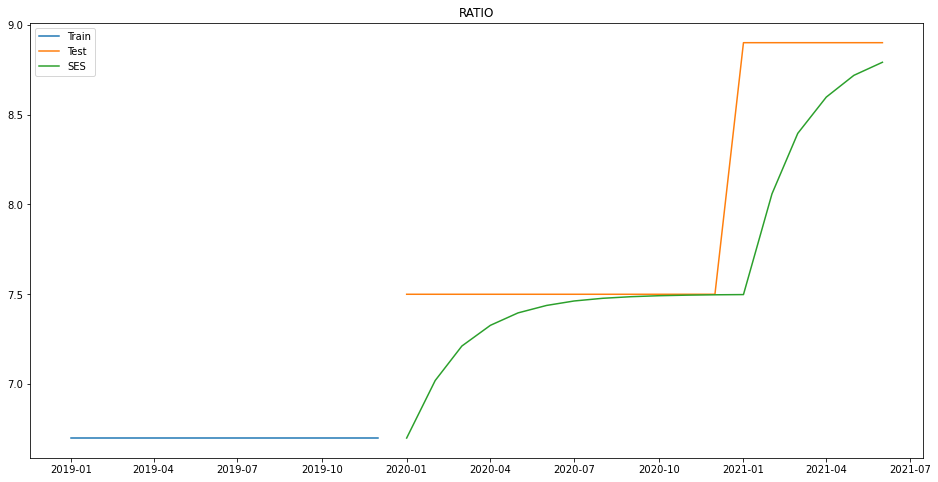

In [169]:
app = tkinterApp()

app.mainloop()